In [1]:
from tst.domutil.util import *
from tst.domutil.test import *

### The whole point of this document is to experiment with normalising the distribution of bitscore from HMM-protein search
## Only to realise that biscore is pre-normalised and equals log( P-value).
### In this case, we think it not useful to log-transform the bitscore (since it's log-transformed already). Thus we might consider using arithmetic mean to aggregate bitscore across entries.

In [2]:
hits = hit4hmm2hsp.objects

{'_state': <django.db.models.base.ModelState at 0x7f3ecd4c3490>,
 'acc_avg': 0.77,
 'bias': 0.0,
 'bitscore': 16.9,
 'end': 230L,
 'id': 192089L,
 'logCevalue': -3.85387196432176,
 'logIevalue': -1.85387196432176,
 'query_id': 13588L,
 'start': 87L,
 'target_id': 18085L}

In [3]:
# bitscores  =  hits.values_list('bitscore',flat =True)

In [4]:
len(bitscores)

5236150

(-10, 200)

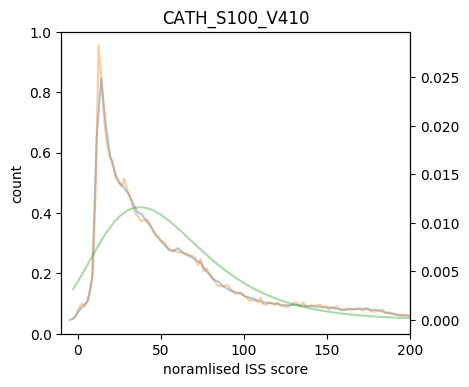

In [68]:
import matplotlib
%matplotlib inline
matplotlib.use("Agg")
from matplotlib import pyplot as plt
from scipy import stats
# from mpl_toolkits.mplot3d import Axes3D
# kwargs = {
#     'projection':'3d',
# }


# vals0 = np.array(vdata)
# vals0 = vals0/(1.01-vals0) 
# vals0 = np.log(vals0)
vals0 = bitscores

kwargs = {'ylabel':'count',
          'xlabel':'noramlised ISS score',
         'title':'CATH_S100_V410',
#           'xlim':[100,200],
         }
plt.close()
siz = [450,400]
DPI=100.
fig = plt.figure(figsize = [x/float(DPI) for x in siz], dpi=DPI)
ax1 = fig.add_subplot(111,**kwargs)
ax1b = ax1.twinx()




lbl = 'Same Class ( 0.5% )'
kargs = {'label': lbl}
vals = vals0

ys,binEdges = np.histogram(vals,bins=500, 
                          density = True
                          )
bincenters  = 0.5 * ( binEdges[1:] + binEdges[:-1] )

ax1b.plot( bincenters, ys, '-' ,
# binsB1 = ax1b.hist( vals,100, 
#     facecolor = 'g',
     alpha = 0.4,
     **kargs
     )

lbl = 'Same Class ( 0.5% )'
kargs = {'label': lbl}
vals = np.random.choice(vals0,50000)

ys,binEdges = np.histogram(vals,bins=500, 
                          density = True
                          )
bincenters  = 0.5 * ( binEdges[1:] + binEdges[:-1] )

ax1b.plot( bincenters, ys, '-' ,
# binsB1 = ax1b.hist( vals,100, 
#     facecolor = 'g',
     alpha = 0.4,
     **kargs
     )

ax1b.plot( bincenters, rv.pdf(bincenters), '-' ,
# binsB1 = ax1b.hist( vals,100, 
#     facecolor = 'g',
     alpha = 0.4,
     **kargs
     )
# ax1b.set_xlim([-10,400])
ax1b.set_xlim([-10,200])
# ax1b.set_ylim([0.0,0.00500])

# ax1b.set

In [83]:
max(vals0)

1349.7

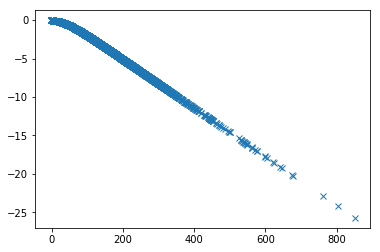

In [82]:
fig, ax = plt.subplots(1, 1)
# rv.cdf()
llike = np.log(1 - rv.cdf(vals) )
ax.plot( vals, llike , 'x' ,

# ax.scatter( vals, llike , '-' ,
#      alpha = 0.4,
#      **kargs
     )

In [31]:
vals = np.random.choice(vals0,50000)
# from numpy import random

array([  18.7,  121.7,   40.1, ...,   74.9,  172. ,   18. ])

(37.360096797331749, 31.663982396311511)


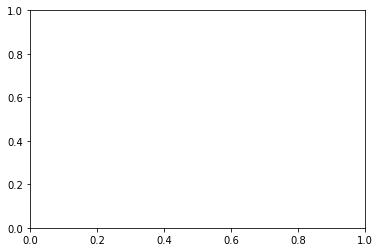

In [65]:
from scipy.stats import genextreme,gumbel_r
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
# c = -0.1
# mean, var, skew, kurt = genextreme.stats(c, moments='mvsk')
vals = np.random.choice(vals0,50000)

# coef = genextreme.fit(vals, 0.)
# coef = genextreme.fit(vals,  0.)
coef = gumbel_r.fit(vals)

print coef

In [71]:
# rv = genextreme(coef[0],loc = coef[1], scale = coef[2])
# rv = genextreme( 0. ,loc = coef[1], scale = coef[2])
rv = gumbel_r(loc = coef[0], scale = coef[1])

(-0.45621916465055701, 30.243392209248938, 23.162541679296048)

In [43]:
x                                            = np.linspace(genextreme.ppf(0.01, c),
              genextreme.ppf(0.99, c), 100)
ax.plot(x, genextreme.pdf(x, c),
         'r-', lw=5, alpha=0.6, label='genextreme pdf')

(-0.45468556646283143, 30.242762440205468, 23.150702986611392)